In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import re
from matplotlib import pyplot as plt
from matplotlib.ticker import LogLocator
from pprint import pprint
tool_dir = '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/ESMF_profiling'
sys.path.append(tool_dir)
from esmf_related_functions import _read_ryaml, _expt_fullname, _extract_ntasks_values, _extract_restart_stop_values
from esmfFileParser import collect_runtime_tot
from collections import defaultdict

In [3]:
pics_folder = "esmf-profiling"
pics_folder = os.path.join(tool_dir, pics_folder)
os.makedirs(pics_folder, exist_ok=True)

In [4]:
expts_manager_path = '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager'
yaml_input = os.path.join(expts_manager_path, 'Expts_manager-1deg-scaling_performance_real.yaml')
yamlfile_path = os.path.join(tool_dir,yaml_input)
yaml_input = _read_ryaml(yamlfile_path)
test_rel_path = yaml_input['test_path']
esmf_expt_dir1 = yaml_input['namelists']['cross_block1']['cross_block1_dirs']
esmf_expt_dirs = list(esmf_expt_dir1)
MOM_full_paths = [os.path.join(expts_manager_path, test_rel_path, esmf_expt_dir) for esmf_expt_dir in  esmf_expt_dirs]
xxx = '000'
ESMF_path = [f"{MOM_full_path}/archive/output{xxx}" for MOM_full_path in MOM_full_paths]
ncpus_list_combo1 = yaml_input['namelists']['cross_block1']['nuopc.runconfig']['PELAYOUT_attributes_combo']
expt_names1 = _expt_fullname(ncpus_list_combo1)
clock1_list_combo1 = yaml_input['namelists']['cross_block1']['nuopc.runconfig']['CLOCK_attributes_combo']
clock1 = _expt_fullname(clock1_list_combo1)
pprint(ESMF_path)
pprint(expt_names1)
pprint(clock1)

['/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_1deg_scaling_performance_real/pt_1_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_1deg_scaling_performance_real/pt_2_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_1deg_scaling_performance_real/pt_3_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_1deg_scaling_performance_real/pt_4_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_1deg_scaling_performance_real/pt_5_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_1deg_scaling_performance_real/pt_6_test/archive/output000',
 '/g/data/tm70/ml0072/COMMON/git_repos/COSIMA_om3-scripts/expts_manager/product1_1deg_scaling_performance_real/pt_7_test/archive/output000',
 '/g/data/tm7

In [5]:
date_values = _extract_restart_stop_values(clock1)


In [6]:
regionNames = [
    '[ESMF]',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ATM] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ROF] RunPhase1',

    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-OCN] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN-TO-MED] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[MED-TO-ICE] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ICE-TO-MED] RunPhase1',

    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ATM-TO-MED] RunPhase1',
    '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[ROF-TO-MED] RunPhase1',

    '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p5/[MED] IPDv03p7/MED: (med_map_mod: RouteHandles_init)',
    '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p3/[ATM] IPDv01p3',
    '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p3/[ROF] IPDv01p3',
    '[ESMF]/[ensemble] Init 1/[ESM0001] IPDv02p3/[ICE] IPDv01p3',
]

In [7]:
%%time
dt=3600
num_baroclinic_ts = 31*24*3600/dt
print(num_baroclinic_ts)
profile_prefix='ESMF_Profile'
# ESMF_Profile.xxx    : (0. count, 1. total, 2. self_time, 3. mean    , 4. min_time, 5. max_time           )
# ESMF_Profile.summary: (0. count, 1. PETs , 2. mean     , 3. min_time, 4. max_time, 5. min_PET, 6. max_PET)
esmf_summary = True
index = 2
runtime_tot = collect_runtime_tot(ESMF_path, regionNames=regionNames, profile_prefix=profile_prefix, esmf_summary=esmf_summary, index=index)
# for tmp in runtime_tot:
#     for k in tmp:
#         tmp[k] = [v/num_baroclinic_ts for v in tmp[k]]

744.0
CPU times: user 400 ms, sys: 372 ms, total: 772 ms
Wall time: 1.2 s


In [8]:
len(runtime_tot)

95

In [9]:
#runtime_tot

In [9]:
def ideal_line(start_x, start_y, x_range, incre, direction='both'):
    ps = []
    if direction in ['backward', 'both']:
        x = start_x
        while x>=x_range[0]:
            y = start_y*(start_x/x)
            ps.insert(0, (x,y))
            x-=incre
    if direction in ['forward', 'both']:
        x = start_x
        while x<=x_range[1]:
            y = start_y*(start_x/x)
            ps.append((x,y))
            x+=incre
    return ps

In [10]:
def ideal_points_based_on_dataset(task_values, select_index, start_index, key_x, update_regionNames, region_index,
                                 x_range, incre=8, direction='both'):
    
    start_x = task_values[select_index[start_index]][key_x]
    start_y = runtime_tot[select_index[start_index]][update_regionNames[region_index]][0]  # [0] from list to float value
    ideal_points = ideal_line(start_x, start_y, x_range, incre, direction=direction)
    ideal_points_x, ideal_points_y = zip(*ideal_points)
    return ideal_points_x, ideal_points_y

In [20]:
# task_values = _extract_ntasks_values(expt_names1)
# print(len(task_values))
# task_values_eff = []
# task_values_eff_indices = []
# for indx, i in enumerate(task_values):
#     task_values_tmp = (i['ice_ntasks']+i['ocn_ntasks'])%48
#     if task_values_tmp%48 == 0:
#         task_values_eff.append(i)
#         task_values_eff_indices.append(indx)
# task_values_eff
# task_values_eff_indices = task_values_eff_indices[1:]
# #task_values_eff_indices

95


In [10]:
task_values = _extract_ntasks_values(expt_names1)
task_values_eff = []
task_values_eff_indices = []
for indx, i in enumerate(task_values):
    if i['ocn_ntasks']+i['ice_ntasks']<=384:#336:
    # if i['ocn_ntasks']<= 336:
        if i['ice_ntasks']%24 == 0:
            task_values_eff.append(i)
            task_values_eff_indices.append(indx)
# print(task_values_eff)
# print((task_values_eff_indices))
task_values_eff_indices

[0,
 1,
 3,
 4,
 5,
 7,
 8,
 10,
 12,
 13,
 16,
 19,
 20,
 21,
 22,
 23,
 26,
 27,
 31,
 34,
 35,
 37,
 39,
 41]

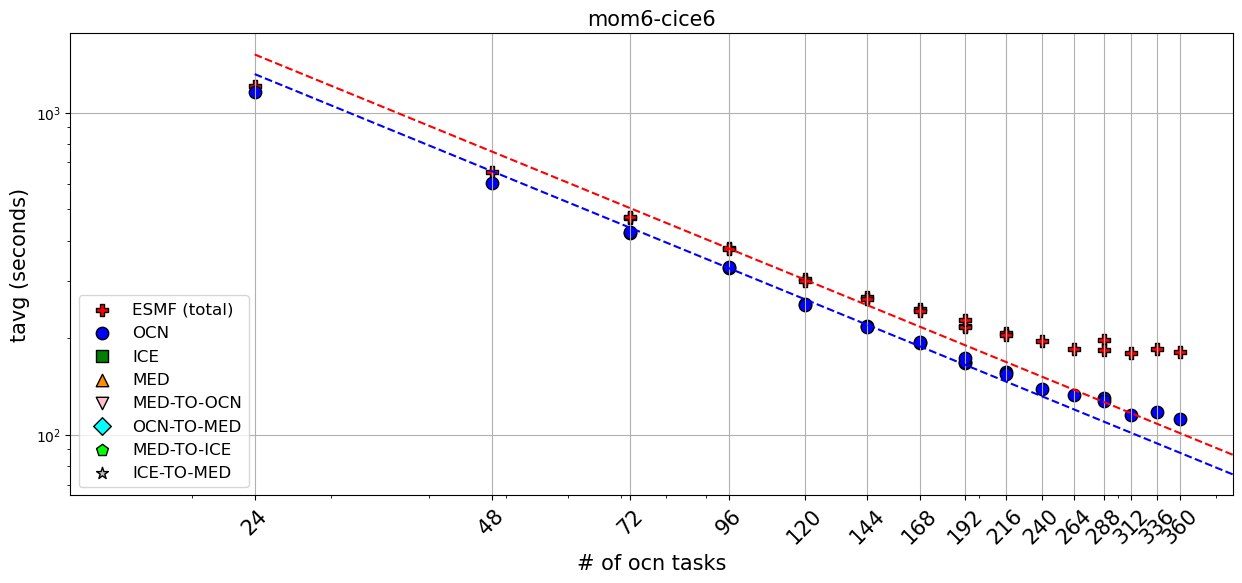

In [34]:
label_fontsize = 15
legend_fontsize = 12
nrows = 1
ncols = 1
figsize = (15, 6)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
axes = axes.flatten() if (nrows * ncols > 1) else [axes]

colors = ['r', 'b', 'g', 'darkorange', 'pink', 'cyan', 'lime', 'silver', 'gold', 'purple', 'grey', 'r', 'g', 'pink']

ocn_ntasks = [i['ocn_ntasks'] for i in task_values]
select_index = task_values_eff_indices
regions_index = [0,1,2,11,5,6,7,8]
update_regionNames = [regionNames[i] for i in regions_index]
regions_markers = ['P', 'o', 's', '^', 'v', 'D', 'p', '*']
regions_legend = [
    "ESMF (total)",
    "OCN",
    "ICE",
    "MED",
    "MED-TO-OCN",
    "OCN-TO-MED",
    "MED-TO-ICE",
    "ICE-TO-MED",
]
focus_regions_index = [0,1]
ideal_regions_index = [0,1]
key_x = 'ocn_ntasks'
x_range = [14, 420]
start_index = 4
incre=12
for i in select_index:
    plot_x_values = task_values[i][key_x]
    region_marker_pairs = zip(range(len(regions_index)), regions_markers)
    try:
        for region_indx, marker in region_marker_pairs:
            if region_indx in focus_regions_index:
                axes[0].scatter(plot_x_values, runtime_tot[i][update_regionNames[region_indx]], marker=marker,
                            facecolors=colors[region_indx], edgecolors='k', s=80)
            else:
                pass
            if region_indx in ideal_regions_index:
                if i == select_index[0]:
                    ix, iy = ideal_points_based_on_dataset(task_values,select_index,start_index,key_x,update_regionNames,region_indx,x_range,incre=incre)
                    axes[0].plot(ix, iy, '--', color=colors[region_indx])
    except KeyError:
        pass

black_marker_legend = []
for i in range(len(regions_index)):
    black_marker_legend_tmp = plt.scatter([0], [0], marker=regions_markers[i], facecolors=f"{colors[i]}", edgecolors='k', s=80, label=f"{regions_legend[i]}")
    black_marker_legend.append(black_marker_legend_tmp)

title = 'mom6-cice6'
axes[0].legend(handles=black_marker_legend, loc='lower left', fontsize=legend_fontsize)


axes[0].grid(True)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
xticks = [ocn_ntasks[i] for i in task_values_eff_indices]
xticks_unique = list(dict.fromkeys(xticks))
axes[0].set_xticks(xticks_unique)
axes[0].set_xticklabels(xticks_unique, rotation=45, fontsize=label_fontsize)
# axes[0].xaxis.set_major_locator(LogLocator(base=10.0, numticks=10))  # Major ticks
# axes[0].xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))  # Minor ticks
# axes[0].yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))  # Major ticks for y-axis
# axes[0].yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))  # Minor ticks for y-axis
axes[0].set_xlabel('# of ocn tasks', fontsize=label_fontsize)
axes[0].set_ylabel('tavg (seconds)', fontsize=label_fontsize)
axes[0].set_title(title, fontsize=label_fontsize)
xlims = x_range
axes[0].set_xlim(xlims)
plt.show()

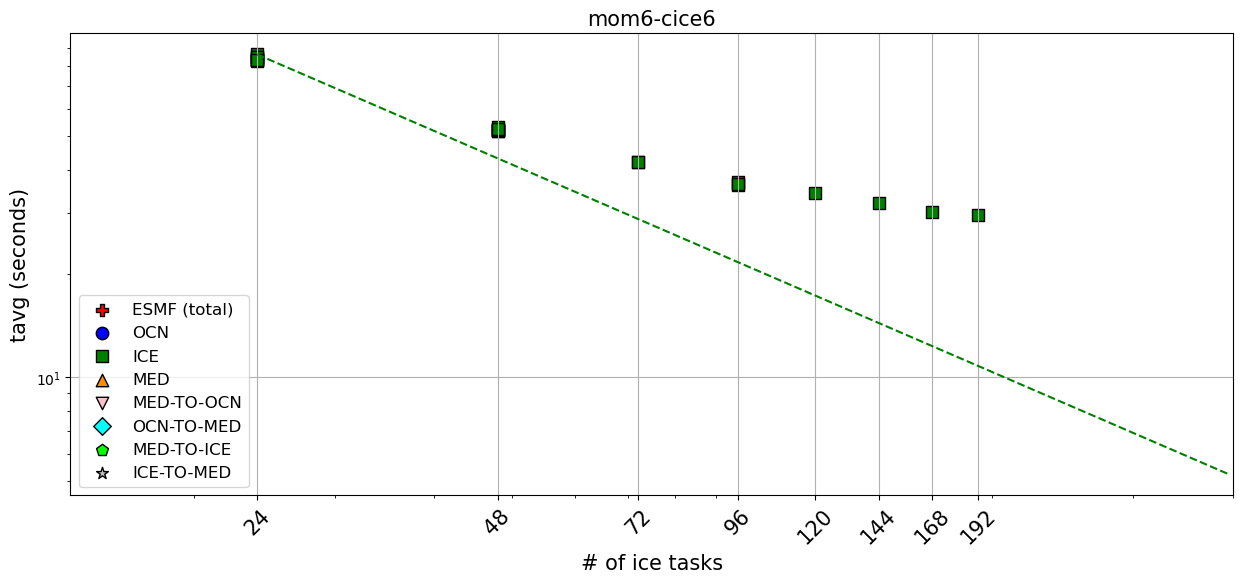

In [36]:
label_fontsize = 15
legend_fontsize = 12
nrows = 1
ncols = 1
figsize = (15, 6)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
axes = axes.flatten() if (nrows * ncols > 1) else [axes]

colors = ['r', 'b', 'g', 'darkorange', 'pink', 'cyan', 'lime', 'silver', 'gold', 'purple', 'grey', 'r', 'g', 'pink']

ntasks = [i['ice_ntasks'] for i in task_values]
select_index = task_values_eff_indices
regions_index = [0,1,2,11,5,6,7,8]
update_regionNames = [regionNames[i] for i in regions_index]
regions_markers = ['P', 'o', 's', '^', 'v', 'D', 'p', '*']
regions_legend = [
    "ESMF (total)",
    "OCN",
    "ICE",
    "MED",
    "MED-TO-OCN",
    "OCN-TO-MED",
    "MED-TO-ICE",
    "ICE-TO-MED",
]
focus_regions_index = [2]
ideal_regions_index = [2]
key_x = 'ice_ntasks'
x_range = [14, 400]
start_index = 0
incre=12
for i in select_index:
    plot_x_values = task_values[i][key_x]
    region_marker_pairs = zip(range(len(regions_index)), regions_markers)
    try:
        for region_indx, marker in region_marker_pairs:
            if region_indx in focus_regions_index:
                axes[0].scatter(plot_x_values, runtime_tot[i][update_regionNames[region_indx]], marker=marker,
                            facecolors=colors[region_indx], edgecolors='k', s=80)
            else:
                pass
            if region_indx in ideal_regions_index:
                if i == select_index[0]:
                    ix, iy = ideal_points_based_on_dataset(task_values,select_index,start_index,key_x,update_regionNames,region_indx,x_range,incre=incre)
                    axes[0].plot(ix, iy, '--', color=colors[region_indx])
    except KeyError:
        pass

black_marker_legend = []
for i in range(len(regions_index)):
    black_marker_legend_tmp = plt.scatter([0], [0], marker=regions_markers[i], facecolors=f"{colors[i]}", edgecolors='k', s=80, label=f"{regions_legend[i]}")
    black_marker_legend.append(black_marker_legend_tmp)

title = 'mom6-cice6'
axes[0].legend(handles=black_marker_legend, loc='lower left', fontsize=legend_fontsize)


axes[0].grid(True)
axes[0].set_xscale('log')
axes[0].set_yscale('log')
xticks = [ntasks[i] for i in task_values_eff_indices]
xticks_unique = list(dict.fromkeys(xticks))
axes[0].set_xticks(xticks_unique)
axes[0].set_xticklabels(xticks_unique, rotation=45, fontsize=label_fontsize)
# axes[0].xaxis.set_major_locator(LogLocator(base=10.0, numticks=10))  # Major ticks
# axes[0].xaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))  # Minor ticks
# axes[0].yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))  # Major ticks for y-axis
# axes[0].yaxis.set_minor_locator(LogLocator(base=10.0, subs='auto', numticks=10))  # Minor ticks for y-axis
axes[0].set_xlabel('# of ice tasks', fontsize=label_fontsize)
axes[0].set_ylabel('tavg (seconds)', fontsize=label_fontsize)
axes[0].set_title(title, fontsize=label_fontsize)
xlims = x_range
axes[0].set_xlim(xlims)
plt.show()

[(48, [(0, 1, {'[ESMF]': [1.6274829301075266], '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1': [1.5535337365591397]})]), (96, [(1, 1, {'[ESMF]': [0.8766202956989247], '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1': [0.8110432795698925]}), (3, 3, {'[ESMF]': [0.6337502688172043], '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1': [0.5680106182795699]})]), (144, [(4, 1, {'[ESMF]': [0.6349853494623656], '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1': [0.5707856182795699]}), (5, 2, {'[ESMF]': [0.508817876344086], '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1': [0.4422209677419355]})]), (192, [(8, 1, {'[ESMF]': [0.5081020161290323], '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1': [0.4441407258064516]})])]


IndexError: list index out of range

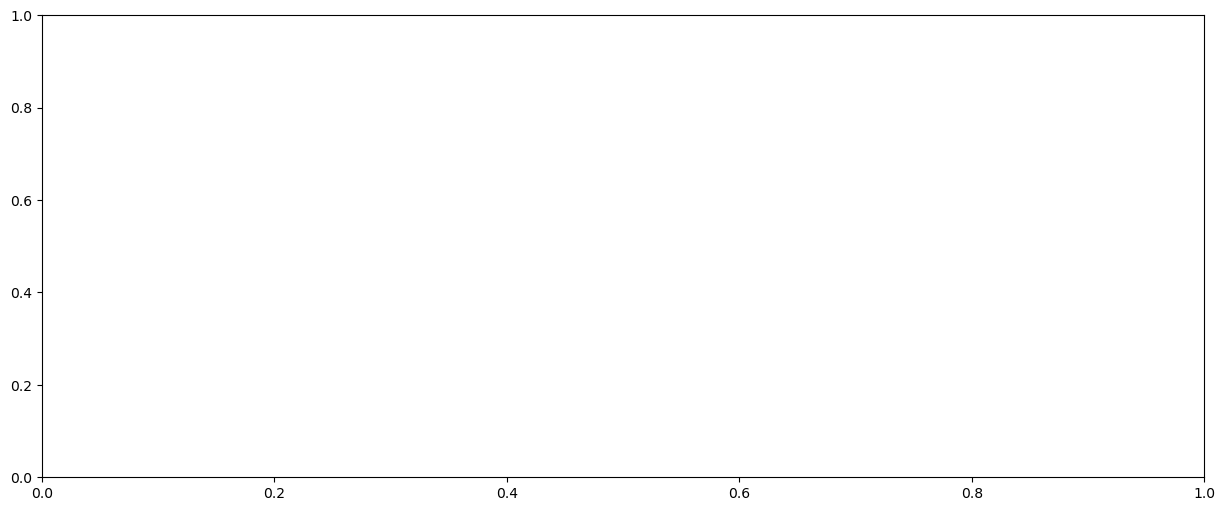

In [211]:
label_fontsize = 15
legend_fontsize = 12
nrows = 1
ncols = 1
figsize = (15, 6)
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
axes = axes.flatten() if (nrows * ncols > 1) else [axes]

colors = ['r', 'b', 'g', 'darkorange', 'pink', 'cyan', 'lime', 'silver', 'gold', 'purple', 'grey', 'r', 'g', 'pink']

ocn_ntasks = [i['ocn_ntasks'] for i in task_values]
ice_ntasks = [i['ice_ntasks'] for i in task_values]
ntasks = [int(ocn_ntasks[i] / ice_ntasks[i]) for i in range(len(ocn_ntasks))]
ntasks_tot = [ice_ntasks[i] + ocn_ntasks[i] for i in range(len(ocn_ntasks))]
select_index = task_values_eff_indices

grouped_values = defaultdict(list)
for idx_tmp in select_index:
    n_tot = ntasks_tot[idx_tmp]
    n_tot_ice = ice_ntasks[idx_tmp]
    n_tot_ocn = ocn_ntasks[idx_tmp]
    n_ratio = int(n_tot_ocn/n_tot_ice)
    runtime_tmp = runtime_tot[idx_tmp]
    grouped_values[n_tot].append((idx_tmp,n_ratio,runtime_tmp))
grouped_values = list(grouped_values.items())
print(grouped_values)

shift_factor = 0
xticks = []
xlabels = []
regions_index      = [0,1,2,11,5,6,7,8]
update_regionNames = [regionNames[i] for i in regions_index]
regions_markers    = ['P', 'o', 's', '^', 'v', 'D', 'p', '*']
for v, indices_and_ratios in grouped_values:
    indices, ratios, runtimes = zip(*indices_and_ratios)
    for i in indices:
        region_marker_pairs = zip(range(len(regions_index)), regions_markers)
        for region_indx, marker in region_marker_pairs:
            if region_indx in focus_regions_index:
                runtime_tmp = runtimes[i][update_regionNames[region_indx]]
    shifted_ratios = [r + shift_factor for r in ratios]
    plt.scatter(shifted_ratios, indices, label=f'Value: {v}', alpha=0.6)
    group_midpoint = (min(shifted_ratios) + max(shifted_ratios)) / 2
    plt.text(group_midpoint, max(indices) + 0.5, f'Value: {v}', 
             ha='center', fontsize=10, color='black', weight='bold')
    xticks.extend(shifted_ratios)
    xlabels.extend(ratios)
    shift_factor += max(ratios) + 2
plt.xticks(xticks, xlabels)
plt.show()

In [11]:
ocn_ntasks = [i['ocn_ntasks'] for i in task_values]
ice_ntasks = [i['ice_ntasks'] for i in task_values]
ntasks = [int(ocn_ntasks[i] / ice_ntasks[i]) for i in range(len(ocn_ntasks))]
ntasks_tot = [ice_ntasks[i] + ocn_ntasks[i] for i in range(len(ocn_ntasks))]
select_index = task_values_eff_indices

grouped_values = defaultdict(list)
for idx_tmp in select_index:
    n_tot = ntasks_tot[idx_tmp]
    n_tot_ice = ice_ntasks[idx_tmp]
    n_tot_ocn = ocn_ntasks[idx_tmp]
    n_ratio = int(n_tot_ocn/n_tot_ice)
    runtime_tmp = runtime_tot[idx_tmp]
    grouped_values[n_tot].append((idx_tmp,n_ratio,runtime_tmp))
grouped_values = list(grouped_values.items())
#grouped_values

In [134]:
def ideal_line(start_x, start_y, x_range, incre, direction='both'):
    ps = []
    ps.append((start_x, start_y))
    if direction in ['backward', 'both']:
        x = start_x-incre
        while x>=x_range[0]:
            y = start_y*(start_x/x)
            ps.insert(0, (x,y))
            x-=incre

    if direction in ['forward', 'both']:
        x = start_x+incre
        while x<=x_range[1]:
            y = start_y*(start_x/x)
            ps.append((x,y))
            x+=incre
    return ps

In [12]:
def ideal_line(start_x, start_y, x_range, incre, direction='both'):
    ps = []
    
    # Check if start_x is within the x_range; if not, adjust start_x to the closest boundary
    start_x_tmp = start_x
    start_y_tmp = start_y

    if start_x < x_range[0]:
        start_x = x_range[0]
    elif start_x > x_range[1]:
        start_x = x_range[1]
    start_y = start_y_tmp*start_x_tmp/start_x
    # Calculate the initial point based on the adjusted start_x
    ps.append((start_x, start_y))

    # Generate points in the backward direction
    if direction in ['backward', 'both']:
        x = start_x - incre
        while x >= x_range[0]:
            y = start_y * (start_x / x)
            ps.insert(0, (x, y))
            x -= incre

    # Generate points in the forward direction
    if direction in ['forward', 'both']:
        x = start_x + incre
        while x <= x_range[1]:
            y = start_y * (start_x / x)
            ps.append((x, y))
            x += incre

    # Filter the points to ensure they are within the specified x_range
    ps = [(x, y) for (x, y) in ps if x_range[0] <= x <= x_range[1]]

    return ps

In [ ]:
# def update_ideal_ps(shifted_ratios, ideal_points):
#     updated_ideal_points = []
    
#     # Update only as many points as there are shifted_ratios
#     for i in range(len(shifted_ratios)):
#         if i < len(ideal_points):
#             # Replace the first element in the tuple with the shifted_ratio value
#             updated_ideal_points.append((shifted_ratios[i], ideal_points[i][1]))
    
#     # Add remaining ideal_points that do not have shifted_ratios to update
#     if len(ideal_points) > len(shifted_ratios):
#         updated_ideal_points.extend(ideal_points[len(shifted_ratios):])
#     return updated_ideal_points

In [ ]:
# def update_ideal_ps(shifted_ratios, ideal_points):
#     # Get the difference between consecutive first values in ideal_points
#     diffs = [ideal_points[i+1][0] - ideal_points[i][0] for i in range(len(ideal_points)-1)]
#     # Add an initial 0 to keep the length of diffs consistent with ideal_points
#     diffs.insert(0, 0)
    
#     # Initialize updated_ideal_points list
#     updated_ideal_points = []
    
#     # Start with the first shifted_ratio value
#     shift_start = shifted_ratios[0]
#     # Loop through the ideal_points and update their first value
#     for i, (x, y) in enumerate(ideal_points):
#         # Use the first shifted_ratio to update the first value and maintain the difference between points
#         updated_ideal_points.append((shift_start, y))
#         # Update shift_start by adding the corresponding difference
#         shift_start += diffs[i]
#     return updated_ideal_points

In [105]:
def update_ideal_ps(shifted_ratios, ideal_points):
    # Get the difference between consecutive first values in ideal_points
    diffs = [ideal_points[i + 1][0] - ideal_points[i][0] for i in range(len(ideal_points) - 1)]
    # Add an initial 0 to keep the length of diffs consistent with ideal_points
    diffs.insert(0, 0)

    # Initialize updated_ideal_points list
    updated_ideal_points = []

    # Start with the first shifted_ratio value
    shift_start = shifted_ratios[0]

    # Loop through the ideal_points and update their first value
    for i, (x, y) in enumerate(ideal_points):
        # Use the first shifted_ratio to update the first value
        updated_ideal_points.append((shift_start, y))

        # Increment shift_start for the next value
        shift_start += 1  # Ensure shift_start increments by 1 for unique values

        # If there are more shifted_ratios, check if we should update to the next one
        if i < len(shifted_ratios) - 1 and shift_start > shifted_ratios[i + 1]:
            shift_start = shifted_ratios[i + 1]

    return updated_ideal_points

In [108]:
def update_ideal_ps(shifted_ratios, ideal_points):
    # Get the difference between consecutive first values in ideal_points
    diffs = [ideal_points[i + 1][0] - ideal_points[i][0] for i in range(len(ideal_points) - 1)]
    # Add an initial 0 to keep the length of diffs consistent with ideal_points
    diffs.insert(0, 0)

    # Initialize updated_ideal_points list
    updated_ideal_points = []

    # Initialize the index for shifted_ratios
    ratio_index = 0

    # Start with the first shifted_ratio value
    shift_start = shifted_ratios[ratio_index]

    # Loop through the ideal_points and update their first value
    for i, (x, y) in enumerate(ideal_points):
        # Use the current shifted_ratio to update the first value
        updated_ideal_points.append((shift_start, y))

        # Check if we need to move to the next shifted_ratio
        if ratio_index < len(shifted_ratios) - 1:
            # Increment shift_start to the next shifted_ratio value
            if i < len(ideal_points) - 1 and shift_start >= shifted_ratios[ratio_index + 1]:
                ratio_index += 1
                shift_start = shifted_ratios[ratio_index]

    return updated_ideal_points

In [69]:
def update_ideal_ps(shifted_ratios, ideal_points):
    # Check that we have at least two shifted_ratios
    if len(shifted_ratios) < 2:
        # If only one shifted_ratio, return ideal_points unchanged
        return [(shifted_ratios[0], y) for _, y in ideal_points]

    # Initialize updated_ideal_points list
    updated_ideal_points = []

    # Total number of ideal points
    total_points = len(ideal_points)

    # Calculate the step size between shifted_ratios
    step_size = (shifted_ratios[-1] - shifted_ratios[0]) / (total_points - 1)

    # Start with the first shifted_ratio value
    shift_start = shifted_ratios[0]

    # Loop through the ideal_points and update their first value
    for i, (x, y) in enumerate(ideal_points):
        # Append the current point with its corresponding y-value
        updated_ideal_points.append((shift_start, y))

        # Increment shift_start for the next value
        shift_start += step_size

    return updated_ideal_points

In [16]:
def update_ideal_ps(shifted_ratios, ideal_points):
    # Check that we have at least two shifted_ratios
    if len(shifted_ratios) < 2:
        # If only one shifted_ratio, return ideal_points unchanged
        return [(shifted_ratios[0], y) for _, y in ideal_points]

    # Initialize updated_ideal_points list
    updated_ideal_points = []

    # Total number of ideal points
    total_points = len(ideal_points)

    # Start with the first shifted_ratio value
    shift_start = shifted_ratios[0]

    # Loop through the shifted_ratios
    for i in range(len(shifted_ratios)):
        if i < total_points:
            # Get the corresponding ideal point for the current shifted_ratio
            y = ideal_points[i][1]  # Use the y-value from ideal_points
            updated_ideal_points.append((shift_start, y))
        else:
            # If there are more shifted_ratios than ideal_points, you may handle it accordingly
            break

        # Increment shift_start to the next shifted_ratio
        if i + 1 < len(shifted_ratios):
            shift_start = shifted_ratios[i + 1]  # Move to the next shifted_ratio

    return updated_ideal_points

In [38]:
def update_ideal_ps(shifted_ratios, ideal_points):
    # Extract x and y values from ideal_points
    ideal_x_values = [x for x, _ in ideal_points]
    ideal_y_values = [y for _, y in ideal_points]

    # Initialize updated_ideal_points list
    updated_ideal_points = []

    # Loop through each shifted_ratio
    for shift in shifted_ratios:
        # Initialize a variable to hold the corresponding y value
        corresponding_y = None

        # Iterate over ideal_x_values to find the closest lower or equal value
        for i in range(len(ideal_x_values)):
            if ideal_x_values[i] <= shift:
                corresponding_y = ideal_y_values[i]
            else:
                break

        # If we found a corresponding y value, append it
        if corresponding_y is not None:
            updated_ideal_points.append((shift, corresponding_y))
        else:
            # If no corresponding y was found, use the first y value
            updated_ideal_points.append((shift, ideal_y_values[0]))

    return updated_ideal_points

In [122]:
def update_ideal_ps(shifted_ratios, ideal_points, ratios, v):
    # Check that we have at least two shifted_ratios
    if len(shifted_ratios) < 2:
        # If only one shifted_ratio, return ideal_points unchanged
        return [(shifted_ratios[0], y) for _, y in ideal_points]

    # Initialize updated_ideal_points list
    updated_ideal_points = []

    # Total number of ideal points
    total_points = len(ideal_points)

    # Calculate the step size between shifted_ratios
    step_size = (shifted_ratios[-1] - shifted_ratios[0]) / (total_points - 1)

    # Start with the first shifted_ratio value
    shift_start = shifted_ratios[0]

    for j in ratios:
        # Calculate tmp_ocn_ncpus for the current ratio
        tmp_ocn_ncpus = v / (j + 1) * j
        print(f'tmp_ocn_ncpus: {tmp_ocn_ncpus}')
        
        # Loop through the ideal_points to find matches
        for i, (x, y) in enumerate(ideal_points):
            if tmp_ocn_ncpus == x:
                updated_ideal_points.append((shift_start, y))
                shift_start += step_size
                continue
        
    return updated_ideal_points

In [146]:
def update_ideal_ps(shifted_ratios, ideal_points, ratios, v):
    # Initialize updated_ideal_points list
    updated_ideal_points = []

    # Create a mapping from ideal point x-values to y-values
    ideal_points_map = {x: y for x, y in ideal_points}
    print(f"ideal_points_map: {ideal_points_map}")
    print(f"ratios: {ratios}")
    # Loop through the shifted_ratios
    for j in ratios:
        # Loop through the ratios to calculate tmp_ocn_ncpus
        print(f"j:{j}")
        # Calculate tmp_ocn_ncpus for the current ratio
        tmp_ocn_ncpus = v / (j + 1) * j
        print(f'tmp_ocn_ncpus1: {tmp_ocn_ncpus}')
        for shift_ratio in shifted_ratios:
            # Check if tmp_ocn_ncpus matches any x value in ideal_points
            if tmp_ocn_ncpus in ideal_points_map:
                print(f"tmp_ocn_ncpus2: {tmp_ocn_ncpus}")
                # If there's a match, append the corresponding y value
                updated_ideal_points.append((shift_ratio, ideal_points_map[tmp_ocn_ncpus]))
                break  # Exit the loop once we find a match
        # else:
        #     # If no match is found, append None or a default value
        #     updated_ideal_points.append((shift_ratio, None))

    return updated_ideal_points

In [155]:
def update_ideal_ps(shifted_ratios, ideal_points, ratios, v):
    # Initialize updated_ideal_points list and a set for unique y values
    updated_ideal_points = []
    unique_y_values = set()

    # Create a mapping from ideal point x-values to y-values
    ideal_points_map = {x: y for x, y in ideal_points}
    print(f"ideal_points_map: {ideal_points_map}")
    print(f"ratios: {ratios}")

    # Loop through the shifted_ratios
    for shift_ratio in shifted_ratios:
        # Loop through the ratios to calculate tmp_ocn_ncpus
        for j in ratios:
            print(f"j: {j}")
            # Calculate tmp_ocn_ncpus for the current ratio
            tmp_ocn_ncpus = v / (j + 1) * j
            print(f'tmp_ocn_ncpus: {tmp_ocn_ncpus}')

            # Check if tmp_ocn_ncpus matches any x value in ideal_points_map
            if tmp_ocn_ncpus in ideal_points_map:
                y_value = ideal_points_map[tmp_ocn_ncpus]
                print(f"Matched tmp_ocn_ncpus: {tmp_ocn_ncpus} with y: {y_value}")

                # Check if y_value has not been added yet
                if y_value not in unique_y_values:
                    # If it's unique, append it and mark the y_value as added
                    updated_ideal_points.append((shift_ratio, y_value))
                    unique_y_values.add(y_value)
                    continue  # Exit the inner loop after finding the first unique match
        else:
            # If no match is found, append None or a default value
            updated_ideal_points.append((shift_ratio, None))

    return updated_ideal_points

1
group total ncpus: 48, group ocn_ncpus: [24], group ice_ncpus: [24]
ratios: (1,)
[ESMF]
selected_runtimes: [1210.8473]
1210.8473
update_ideal_points: [(1, 1210.8473)]
[OCN] RunPhase1
selected_runtimes: [1155.8291]
1155.8291
update_ideal_points: [(1, 1155.8291)]
2
group total ncpus: 96, group ocn_ncpus: [48, 72], group ice_ncpus: [48, 24]
ratios: (1, 3)
[ESMF]
selected_runtimes: [652.2055, 471.5102]
update_ideal_points: [(3, 577.91455), (5, 385.2763666666666)]
[OCN] RunPhase1
selected_runtimes: [603.4162, 422.5999]
update_ideal_points: [(3, 577.91455), (5, 385.2763666666666)]
3
group total ncpus: 144, group ocn_ncpus: [72, 96, 120], group ice_ncpus: [72, 48, 24]
ratios: (1, 2, 5)
[ESMF]
selected_runtimes: [472.4291, 378.5605, 304.1284]
update_ideal_points: [(7, 385.27636666666666), (8, 288.957275), (11, 231.16582)]
[OCN] RunPhase1
selected_runtimes: [424.6645, 329.0124, 254.3333]
update_ideal_points: [(7, 385.27636666666666), (8, 288.957275), (11, 231.16582)]
4
group total ncpus: 192,

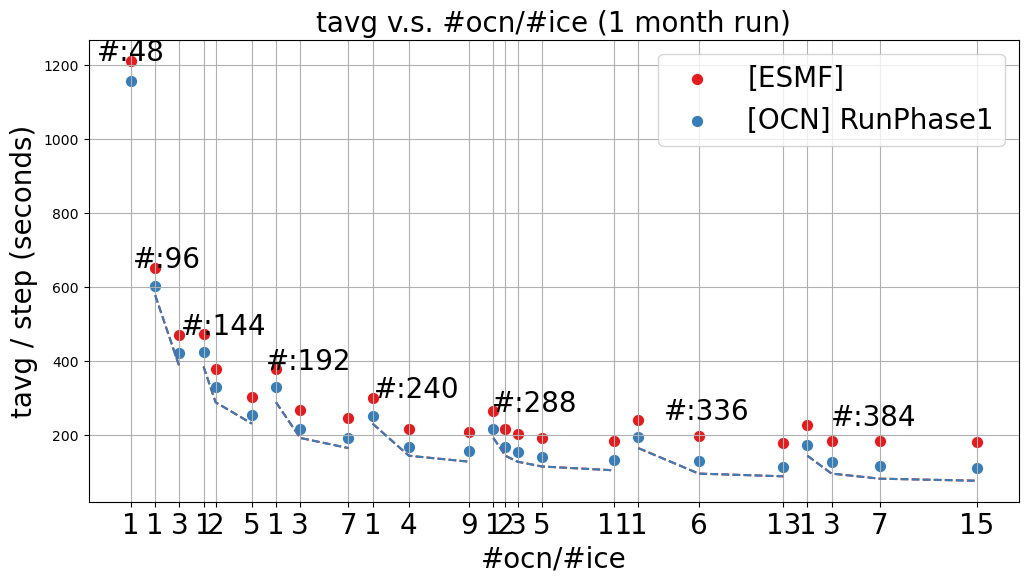

In [14]:
import matplotlib.pyplot as plt
import itertools
direction = 'both'
incre = 12
labelfontsize = 20
# Function to plot scatter plots and label each group once for all runtime types
def plot_grouped_scatter(grouped_values, runtime_keys):
    # Initialize the figure
    plt.figure(figsize=(12, 6))
    shift_factor = 0
    xticks = []
    xlabels = []
    plotted_labels = set()  # Track which runtime labels have been plotted to avoid duplicates
    # Define a color cycle, enough colors for each runtime key
    color_cycle = itertools.cycle(plt.cm.Set1.colors)  # Set1 is a color map with distinguishable colors
    runtime_colors = {runtime_key: next(color_cycle) for runtime_key in runtime_keys}

    count=0
    for v, indices_and_ratios in grouped_values:
        count+=1
        print(count)
        indices, ratios, runtimes = zip(*indices_and_ratios)
        print(f"group total ncpus: {v}, group ocn_ncpus: {[int(v/(k+1)*k) for k in ratios]}, group ice_ncpus: {[int(v/(k+1)) for k in ratios]}")
        print(f"ratios: {ratios}")
        group_shifted_ratios = []
        for runtime_key in runtime_keys:
            print(runtime_key.split("/")[-1])
            # Check if the runtime_key exists in the runtime dictionaries for this group
            try:
                selected_runtimes = [runtime_dict[runtime_key][0] for runtime_dict in runtimes]
                print(f"selected_runtimes: {selected_runtimes}")
            except KeyError:
                print(f"Key '{runtime_key}' not found in all groups.")
                continue

            # Apply the shift factor to the ratios
            shifted_ratios = [r + shift_factor for r in ratios]
            #print(f"shifted_ratios: {shifted_ratios}")
            group_shifted_ratios.extend(shifted_ratios)  # Collect shifted ratios for labeling

            # Get color for the current runtime key
            runtime_color = runtime_colors[runtime_key]

            # Plot scatter for the selected runtimes, add label only once per runtime_key
            if runtime_key not in plotted_labels:
                plt.scatter(shifted_ratios, selected_runtimes, label=runtime_key.split("/")[-1], color=runtime_color, alpha=1, s=50)
                plotted_labels.add(runtime_key)
            else:
                plt.scatter(shifted_ratios, selected_runtimes, color=runtime_color, alpha=1, s=50)

            if count == 1:
                vx_start = v/(ratios[0]+1)
                vx_end   = v/(ratios[-1]+1)*ratios[-1]
                select_rts = selected_runtimes[0]
                print(select_rts)
                start_tmp = vx_start
                end_tmp   = vx_end
                # print(f"start_tmp: {start_tmp}")
                # print(f"end_tmp: {end_tmp}")
                start_x   = start_tmp
                start_y   = select_rts
                
            x_range   = [v/(ratios[0]+1)*ratios[0], v/(ratios[-1]+1)*ratios[-1]]
            ideal_points = ideal_line(start_x, start_y, x_range, incre, direction=direction)
            updated_ideal_points = update_ideal_ps(shifted_ratios, ideal_points, ratios, v)
            print(f'update_ideal_points: {updated_ideal_points}')
            tmp_xvalues = [p[0] for p in updated_ideal_points]
            tmp_yvalues = [p[1] for p in updated_ideal_points]
            plt.plot(tmp_xvalues, tmp_yvalues, '--',color=runtime_color)

        # Calculate the central position for the group label (use the mean of the shifted ratios)
        group_center_ratio = sum(group_shifted_ratios) / len(group_shifted_ratios)
        max_runtime = max([runtime_dict[runtime_keys[0]][0] for runtime_dict in runtimes])  # Max runtime for placing label

        # Plot the group label (value v) once above all runtime points in the group
        plt.text(group_center_ratio, max_runtime + 0.2, f'#:{v}', ha='center', fontsize=labelfontsize, color='black')

        xticks.extend(shifted_ratios)
        xlabels.extend([f'{r}' for r in ratios])  # Ensure original ratio values are added as labels

        # Increment the shift factor for the next group
        shift_factor += max(ratios) + 1

    # Get unique xticks and corresponding labels
    unique_xticks = sorted(set(xticks))
    unique_xlabels = [xlabels[xticks.index(x)] for x in unique_xticks]  # Corresponding unique labels
    # plt.yscale("log")
    # plt.xscale("log")
    #plt.xlim(0.9, 100)
    # Set the x-ticks to be the unique shifted ratios and display the original ratio values as labels
    plt.xticks(unique_xticks, unique_xlabels, fontsize=labelfontsize)

    # Add labels and title
    plt.xlabel('#ocn/#ice', fontsize=labelfontsize)
    plt.ylabel('tavg / step (seconds)', fontsize=labelfontsize)
    plt.title('tavg v.s. #ocn/#ice (1 month run)', fontsize=labelfontsize)
    #plt.legend(title='Runtime Types')
    plt.legend(fontsize=labelfontsize)
    plt.grid()

    # Show the plot
    plt.show()

# Example of user selecting multiple runtime keys for plotting
selected_runtime_keys = ['[ESMF]', '[ESMF]/[ensemble] RunPhase1/[ESM0001] RunPhase1/[OCN] RunPhase1']  # Change this to the desired keys
plot_grouped_scatter(grouped_values, selected_runtime_keys)

In [13]:
def update_ideal_ps(shifted_ratios, ideal_points, ratios, v):
    # Initialize updated_ideal_points list and a set for unique y values
    updated_ideal_points = []
    unique_y_values = set()

    # Create a mapping from ideal point x-values to y-values
    ideal_points_map = {x: y for x, y in ideal_points}
    # print(f"ideal_points_map: {ideal_points_map}")
    # print(f"ratios: {ratios}")

    # Loop through the shifted_ratios
    for shift_ratio in shifted_ratios:
        match_found = False  # Flag to indicate if a match was found for this shift_ratio

        # Loop through the ratios to calculate tmp_ocn_ncpus
        for j in ratios:
            # print(f"j: {j}")
            # Calculate tmp_ocn_ncpus for the current ratio
            tmp_ocn_ncpus = v / (j + 1) * j
            # print(f'tmp_ocn_ncpus: {tmp_ocn_ncpus}')

            # Check if tmp_ocn_ncpus matches any x value in ideal_points_map
            if tmp_ocn_ncpus in ideal_points_map:
                y_value = ideal_points_map[tmp_ocn_ncpus]
                # print(f"Matched tmp_ocn_ncpus: {tmp_ocn_ncpus} with y: {y_value}")

                # Check if y_value has not been added yet
                if y_value not in unique_y_values:
                    # If it's unique, append it and mark the y_value as added
                    updated_ideal_points.append((shift_ratio, y_value))
                    unique_y_values.add(y_value)
                    match_found = True  # Set flag to true
                    # No break here; continue checking other ratios for the same shift_ratio
                # If we have found a match and added it, no need to check further
                if match_found:
                    break  # Exit the inner loop to continue with the next shift_ratio
        else:
            # If no match is found after checking all ratios, append None or a default value
            updated_ideal_points.append((shift_ratio, None))

    return updated_ideal_points

In [64]:
def update_ideal_ps(shifted_ratios, ideal_points):
    # Initialize updated_ideal_points list
    updated_ideal_points = []
    
    # Length of ideal_points
    total_points = len(ideal_points)

    # Calculate the mapping of shifted_ratios to ideal_points
    for shift in shifted_ratios:
        # Calculate the corresponding index in ideal_points
        # We need to scale the shifted_ratio to fit within the indices of ideal_points
        index = round((shift - shifted_ratios[0]) / (shifted_ratios[-1] - shifted_ratios[0]) * (total_points - 1))
        
        # Ensure the index is within bounds
        index = min(max(index, 0), total_points - 1)

        # Get the corresponding y value from ideal_points based on calculated index
        corresponding_y = ideal_points[index][1]

        # Append the updated point to the list
        updated_ideal_points.append((shift, corresponding_y))

    return updated_ideal_points

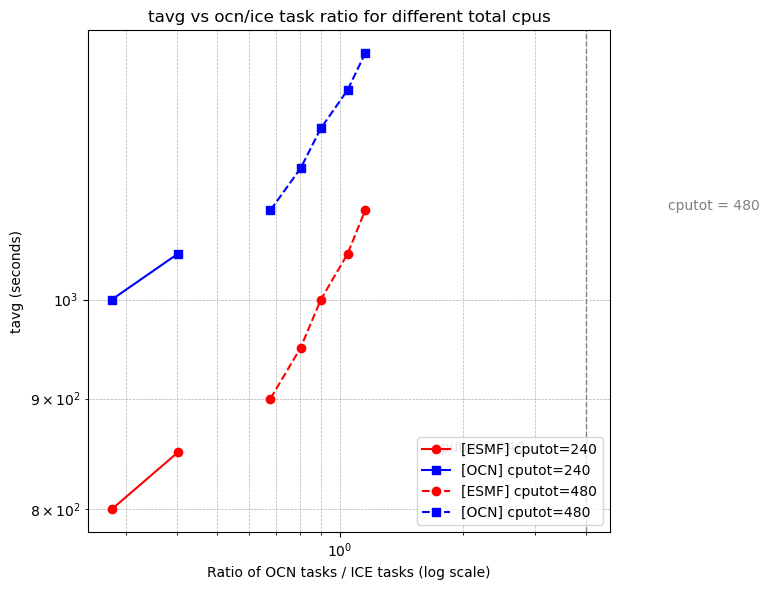

In [178]:
import numpy as np
import matplotlib.pyplot as plt

# Data for the two groups
group_1_cputot = 240
group_1_ratios = np.array([3, 4])  # ocn_ntasks/ice_ntasks ratios
group_1_runtime_ESMF = np.array([800, 850])  # Example runtime data for ESMF
group_1_runtime_OCN = np.array([1000, 1050])  # Example runtime data for OCN

group_2_cputot = 480
group_2_ratios = np.array([3, 4, 5, 7, 9])  # ocn_ntasks/ice_ntasks ratios
group_2_runtime_ESMF = np.array([900, 950, 1000, 1050, 1100])  # Example runtime for ESMF
group_2_runtime_OCN = np.array([1100, 1150, 1200, 1250, 1300])  # Example runtime for OCN

# Initialize the plot
plt.figure(figsize=(8, 6))

# Shift the x-axis for each group to avoid overlap
group_1_shift = np.log10(group_1_ratios) - 0.2  # Shifting for better distinction
group_2_shift = np.log10(group_2_ratios) + 0.2

# Plot for group 1 (cputot = 240)
plt.plot(group_1_shift, group_1_runtime_ESMF, 'ro-', label='[ESMF] cputot=240', markersize=6)  # Red dots
plt.plot(group_1_shift, group_1_runtime_OCN, 'bs-', label='[OCN] cputot=240', markersize=6)  # Blue squares

# Plot for group 2 (cputot = 480)
plt.plot(group_2_shift, group_2_runtime_ESMF, 'ro--', label='[ESMF] cputot=480', markersize=6)  # Red dots, dashed line
plt.plot(group_2_shift, group_2_runtime_OCN, 'bs--', label='[OCN] cputot=480', markersize=6)  # Blue squares, dashed line

# Customize the plot
plt.xscale('log')  # Log scale for x-axis
plt.yscale('log')  # Log scale for y-axis
plt.xlabel('Ratio of OCN tasks / ICE tasks (log scale)')
plt.ylabel('tavg (seconds)')
plt.title('tavg vs ocn/ice task ratio for different total cpus')
plt.legend(loc='lower right')

# Annotate cputot values at the top of each group of points
plt.text(10 ** group_1_shift.mean(), max(group_1_runtime_ESMF), f'cputot = {group_1_cputot}', color='gray', ha='center')
plt.text(10 ** group_2_shift.mean(), max(group_2_runtime_ESMF), f'cputot = {group_2_cputot}', color='gray', ha='center')

# Add vertical dashed lines to separate the groups visually
plt.axvline(x=group_1_ratios[-1], color='gray', linestyle='--', linewidth=1)  # Between group 1 and 2

# Show grid and plot
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.tight_layout()
plt.show()

In [71]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.max_colwidth', None)

In [80]:
def profiling_test_select_cores(tot:list,
                 ratio_m2i_start:int = 3,
                 ratio_m2i_max:int = 20,
                 cores_ice_min_start:int = 1000,
                 cores_ice_min_threshold:int = 48,
                 cores_ice_max_threshold:int = 456,
                 cores_ocn_max_threshold:int = 2688):

    cores_ice_total = []
    cores_mom_total = []
    cores_tot_total = []

    """
    Selects cores based on given thresholds and ratios.

    Parameters:
    tot (list): A list of total cores.
    ratio_m2i_start (int): Initial ratio of ocn to ice cores. Default is 3.
    cores_ice_min_start (int): Initial minimum ice cores. Default is 1000. 
    cores_ice_min_threshold (int): Minimum threshold for ice cores.
    cores_ice_max_threshold (int): Maximum threshold for ice cores.
    cores_ocn_max_threshold (int): Maximum threshold for ocn cores.

    Returns:
    list: A list of selected cores.
    """
    count = 0
    ratio_tot = []
    for i in range(len(tot)):
        ratio_m2i_min = ratio_m2i_start
        cores_ice_min = cores_ice_min_start
        while cores_ice_min >= cores_ice_min_threshold:
            cores_ice_min = tot[i] / (ratio_m2i_min + 1)
            #print(ratio_m2i_min)
            if cores_ice_min < cores_ice_min_threshold or cores_ice_min > cores_ice_max_threshold or ratio_m2i_min >ratio_m2i_max:
                # Set a flag to indicate that one of the conditions is met
                ratio_m2i_min += 1
                continue
                
            if cores_ice_min % 1 == 0:  # Check cores_ice_min is integer and no conditions are met
                #if cores_ice_min % 24 == 0:  # check cores_ice_min is 24x
                cores_ice_min = int(cores_ice_min)
                cores_mom_min = tot[i] - cores_ice_min
                if cores_mom_min > cores_ocn_max_threshold:
                    ratio_m2i_min += 1
                    continue
                cores_tot_min = cores_ice_min+cores_mom_min

                cores_tot_total.append(cores_tot_min)
                cores_ice_total.append(cores_ice_min)
                cores_mom_total.append(cores_mom_min)
                ratio_tot.append(ratio_m2i_min)
                count += 1
                # print(f'ratio_m2i_min: {ratio_m2i_min}')
                # print(cores_mom_min, cores_ice_min)

            ratio_m2i_min += 1
            
    # pprint(f'total acting cores: {cores_tot_total}')
    # pprint(f'total ICE cores: {cores_ice_total}')
    # pprint(f'total MOM cores: {cores_mom_total}')
    # pprint(f'ratio of MOM to ICE: {ratio_tot}')
    pprint(f'total count of runs: {count}')
    pprint(f'input total cores: {tot}')
    # for i in range(len(cores_tot_total)):
    #     pprint(f'{cores_tot_total[i]}, {cores_ice_total[i]}, {cores_mom_total[i]}')
    df = pd.DataFrame({
    'Total Cores': cores_tot_total,
    'ICE Cores': cores_ice_total,
    'MOM Cores': cores_mom_total,
    'ratio of MOM to ICE': ratio_tot,
    })

    return cores_tot_total,cores_ice_total,cores_mom_total,ratio_tot,count, df

In [49]:
tot = [48*i for i in range(1,15)]
tot

[48, 96, 144, 192, 240, 288, 336, 384, 432, 480, 528, 576, 624, 672]

In [81]:
ncpus_tot,ncpus_ice,ncpus_mom,ratio_tot,count,df = profiling_test_select_cores(tot = tot,
                 ratio_m2i_start = 1,
                 ratio_m2i_max = 20,
                 cores_ice_min_start = 1e9,  # set a high value
                 cores_ice_min_threshold = 24,
                 cores_ice_max_threshold = 288,
                 cores_ocn_max_threshold = 864)

'total count of runs: 95'
('input total cores: [48, 96, 144, 192, 240, 288, 336, 384, 432, 480, 528, '
 '576, 624, 672]')


In [82]:
df

,Total Cores,ICE Cores,MOM Cores,ratio of MOM to ICE
0,48,24,24,1
1,96,48,48,1
2,96,32,64,2
3,96,24,72,3
4,144,72,72,1
5,144,48,96,2
6,144,36,108,3
7,144,24,120,5
8,192,96,96,1
9,192,64,128,2
